<a href="https://colab.research.google.com/github/vaibhatt/Fall_Fest_iNets/blob/main/corona_detection_using_Xray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset at:**

https://www.kaggle.com/gunhcolab/fan-fest-20-covid-healthcare-and-economy

In [1]:
import numpy as np 
import pandas as pd
import keras
from keras.layers import *
from keras.models import *
from keras.preprocessing import image
from keras.utils.vis_utils import plot_model
import gc
import tensorflow as tf

In [2]:
trainPATH = '/content/drive/MyDrive/Colab Notebooks/CovidDataset/Train'
valPATH = '/content/drive/MyDrive/Colab Notebooks/CovidDataset/Val'

In [3]:
train_preprocess = image.ImageDataGenerator(
                                        rescale = 1./255,
                                        zoom_range = 0.2,
                                        shear_range = 0.2,
                                        horizontal_flip = True
                                    )

train = train_preprocess.flow_from_directory(
                                        trainPATH,
                                        target_size = (224, 224),
                                        batch_size = 16,
                                        class_mode = 'binary'
                                    )

Found 224 images belonging to 2 classes.


In [4]:
validation_preprocess = image.ImageDataGenerator(
                                        rescale=1./255
                                    )

val = validation_preprocess.flow_from_directory(
                                        valPATH,
                                        target_size = (224, 224),
                                        batch_size = 16,
                                        class_mode = 'binary'
)

Found 60 images belonging to 2 classes.


In [5]:
train.class_indices

{'Covid': 0, 'Normal': 1}

In [6]:
val.class_indices

{'Covid': 0, 'Normal': 1}

**This is the simplest effective model out there**

In [7]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(128, (3, 3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

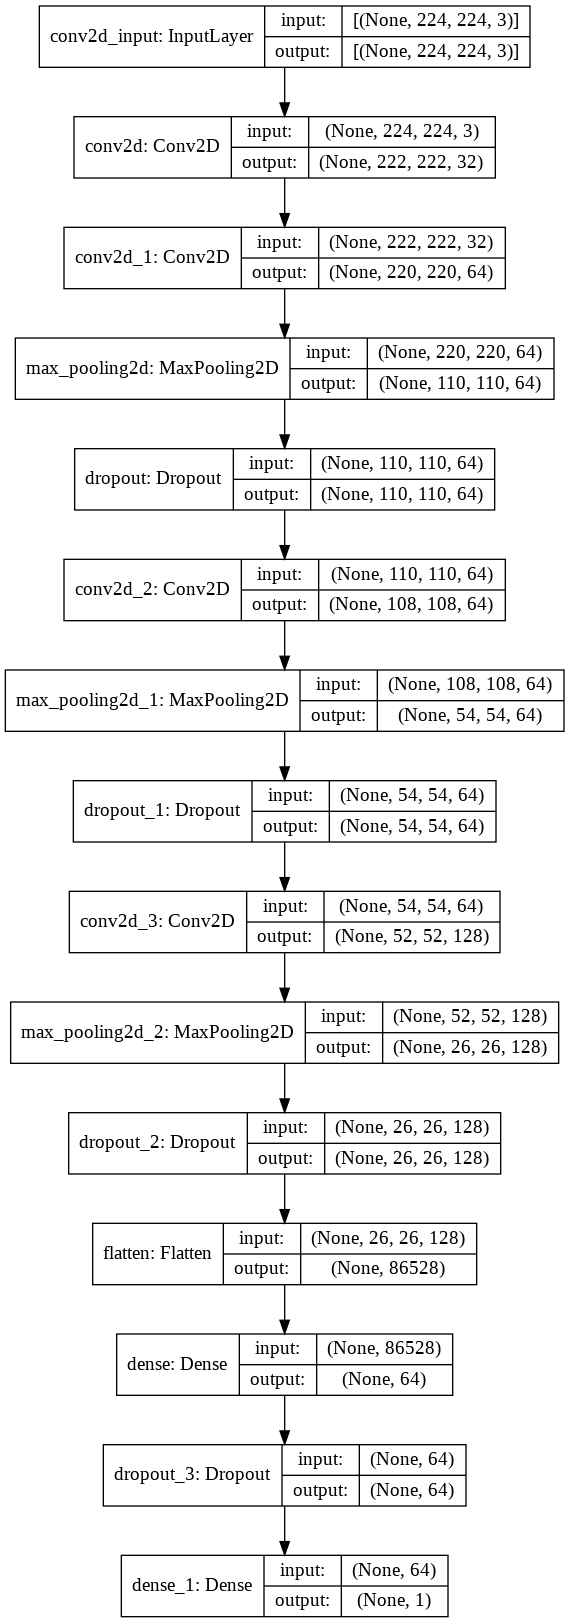

In [8]:
plot_model(
            model, 
            to_file = 'modelplot.png', 
            show_shapes = True, 
            show_layer_names = True, 
            rankdir = "TB", 
            expand_nested = True,
            dpi = 96
          )

In [9]:
history = model.fit_generator(
                                train,
                                epochs = 10,
                                validation_data = val
                            )

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
14/14 [==============================] - 139s 10s/step - loss: 1.2081 - accuracy: 0.5488 - val_loss: 0.5894 - val_accuracy: 0.9333
Epoch 2/10
14/14 [==============================] - 11s 767ms/step - loss: 0.4532 - accuracy: 0.7850 - val_loss: 0.3055 - val_accuracy: 0.9667
Epoch 3/10
14/14 [==============================] - 11s 749ms/step - loss: 0.2718 - accuracy: 0.8749 - val_loss: 0.2769 - val_accuracy: 0.9667
Epoch 4/10
14/14 [==============================] - 11s 761ms/step - loss: 0.2102 - accuracy: 0.9317 - val_loss: 0.1913 - val_accuracy: 0.9833
Epoch 5/10
14/14 [==============================] - 11s 771ms/step - loss: 0.1441 - accuracy: 0.9469 - val_loss: 0.0830 - val_accuracy: 0.9833
Epoch 6/10
14/14 [==============================] - 11s 763ms/step - loss: 0.1432 - accuracy: 0.9297 - val_loss: 0.0954 - val_accuracy: 0.9833
Epoch 7/10
14/14 [==============================] - 11s 765ms/step - loss: 0.1678 - accuracy: 0.9300 - val_loss: 0.1359 - val_accuracy: 0.9500
